In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyroomacoustics as pra
from numpy import hamming
import audio_functions as af
import plot

In [2]:
fs = 48000
room = af.simulate("prueba")
print(type(room))

<class 'pyroomacoustics.room.ShoeBox'>


<class 'numpy.ndarray'>
(4, 194898)
The RT60 is 1296 ms


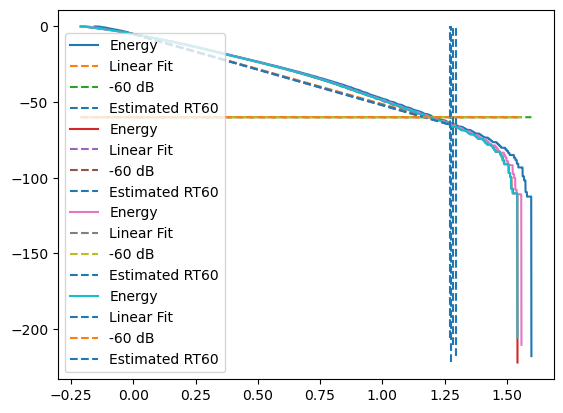

<Figure size 640x480 with 0 Axes>

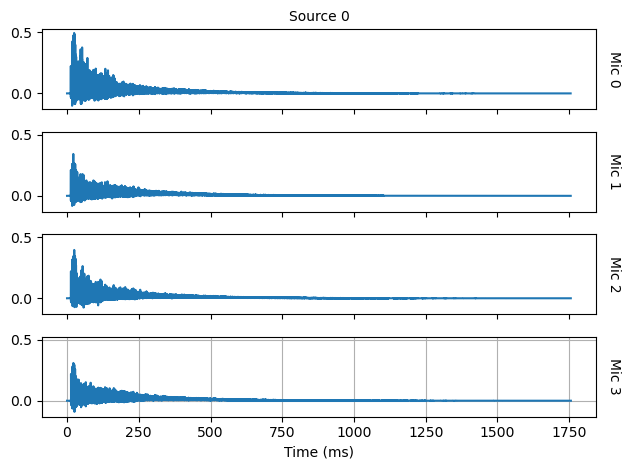

In [3]:
#Obtengo las grabaciones de los micrófonos
señales_captadas = room.mic_array.signals

print(type(señales_captadas))
print(señales_captadas.shape)

#Obtengo la rir
room.compute_rir()

#Obtengo el T60 a partir de la rir, cualquiera de los dos métodos anda más o menos (son una poronga)
#t60 = pra.experimental.rt60.measure_rt60(room.rir[0][0], fs=room.fs, plot=True)
t60 = room.measure_rt60(plot = True)

print(f"The RT60 is {t60[0, 0] * 1000:.0f} ms")


plt.figure()
room.plot_rir()
plt.grid()

#Notar que de las grabaciones tomo el 0, si hubieran más mics lo elijo a partir de ese índice
af.play_audio(señales_captadas[0], fs)